In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
train=pd.read_csv(r'C:\Users\Vineet Rawat\Downloads\dataset\train.csv')
test=pd.read_csv(r'C:\Users\Vineet Rawat\Downloads\dataset\test.csv')

FileNotFoundError: [Errno 2] File C:\Users\Vineet Rawat\Downloads\dataset\train.csv does not exist: 'C:\\Users\\Vineet Rawat\\Downloads\\dataset\\train.csv'

In [3]:
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


Cleaning data

In [4]:
train.isnull().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
Cost                        0
dtype: int64

In [5]:
round(train.isnull().mean()*100,2)

Customer Id               0.00
Artist Name               0.00
Artist Reputation        11.54
Height                    5.77
Width                     8.98
Weight                    9.03
Material                 11.75
Price Of Sculpture        0.00
Base Shipping Price       0.00
International             0.00
Express Shipment          0.00
Installation Included     0.00
Transport                21.42
Fragile                   0.00
Customer Information      0.00
Remote Location          11.86
Scheduled Date            0.00
Delivery Date             0.00
Customer Location         0.00
Cost                      0.00
dtype: float64

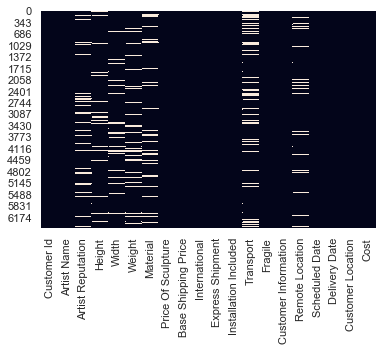

In [6]:
sns.heatmap(train.isnull(),cbar=False)

In [7]:
train.shape

(6500, 20)

In [8]:
train.Cost.describe(include='all')

count    6.500000e+03
mean     1.713920e+04
std      2.406579e+05
min     -8.801727e+05
25%      1.884400e+02
50%      3.820650e+02
75%      1.156115e+03
max      1.114343e+07
Name: Cost, dtype: float64

In [9]:
len(train[train.Cost<0])

659

In [10]:
train['mod_cost']=train.Cost.apply(lambda x:x*(-1) if x<0 else x)

In [11]:
train['mod_cost'].describe(include='all')

count    6.500000e+03
mean     1.883983e+04
std      2.405307e+05
min      8.607000e+01
25%      2.267950e+02
50%      4.581550e+02
75%      1.366273e+03
max      1.114343e+07
Name: mod_cost, dtype: float64

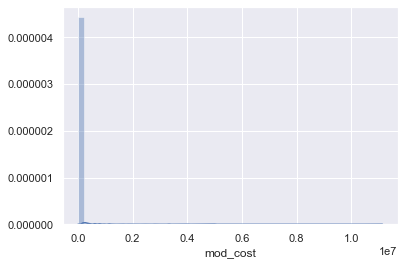

In [12]:
sns.distplot(train['mod_cost'])

In [13]:
train['mod_cost'].skew(),train['mod_cost'].kurt()

(29.86640618935751, 1126.306590062782)

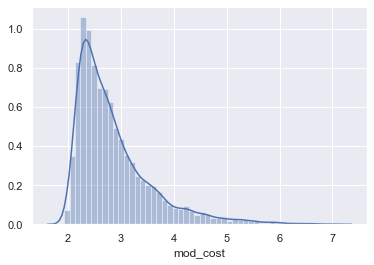

In [14]:
sns.distplot(np.log10(train['mod_cost']))

In [15]:
train['mod_cost']=np.log10(train['mod_cost'])

In [16]:
train['mod_cost'].skew(),train['mod_cost'].kurt()

(1.7632204176472357, 3.8282693743678253)

In [17]:
train['mod_cost'].describe(include='all')

count    6500.000000
mean        2.863324
std         0.717782
min         1.934852
25%         2.355633
50%         2.661012
75%         3.135537
max         7.047019
Name: mod_cost, dtype: float64

In [18]:
num=train.select_dtypes(exclude='object')
cat=train.select_dtypes(include='object')

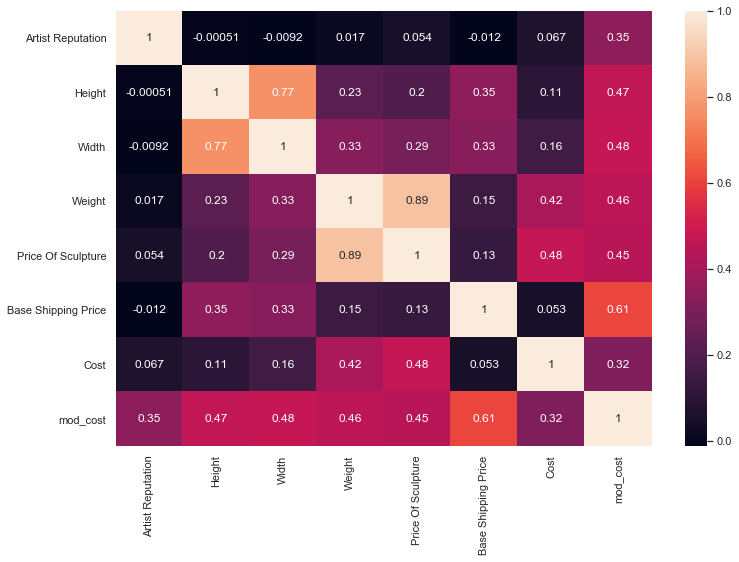

In [19]:
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(num.corr(),annot=True)

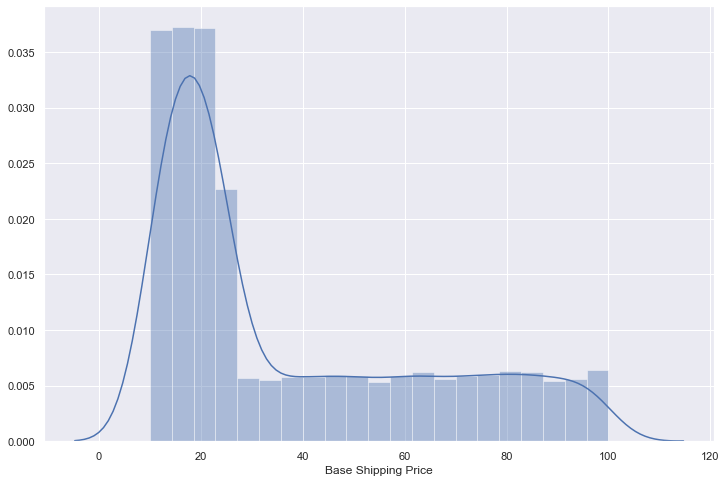

In [20]:
sns.distplot(train['Base Shipping Price'])

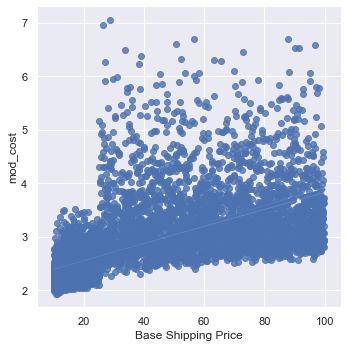

In [21]:
sns.lmplot(x='Base Shipping Price',y='mod_cost',data=train)

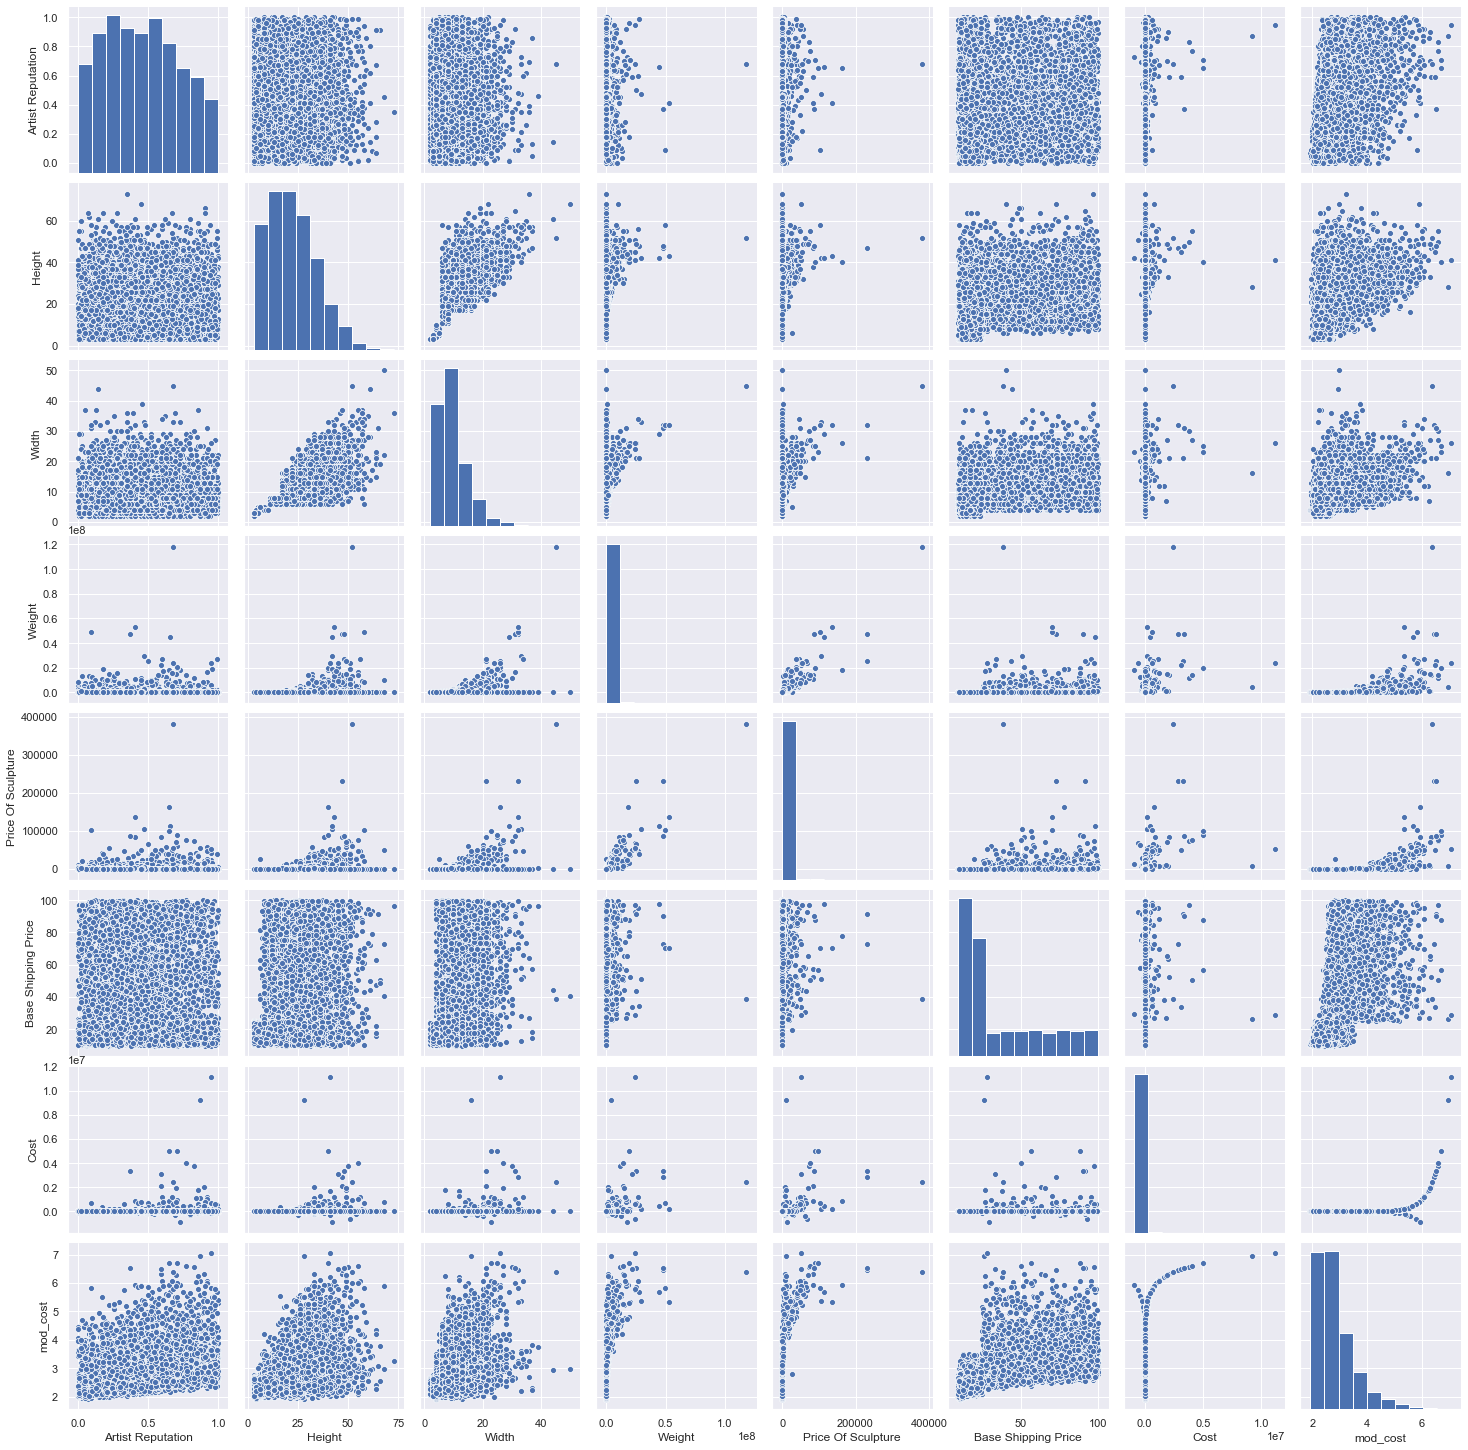

In [160]:
sns.pairplot(num)

In [22]:
cat

,Customer Id,Artist Name,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3900350033003300,Billy Jenkins,Brass,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,fffe3800330031003900,Jean Bryant,Brass,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,fffe3600370035003100,Laura Miller,Clay,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
3,fffe350031003300,Robert Chaires,Aluminium,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375"
4,fffe3900320038003400,Rosalyn Krol,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335"
6496,fffe310036003400,Larry Edwards,NaN,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766"
6497,fffe3600300031003300,Denise Worth,Clay,Yes,No,No,NaN,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823"
6498,fffe3600350035003900,Daniel Drew,Stone,No,Yes,No,Roadways,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006"


In [23]:
len(cat['Artist Name'].unique())

6449

In [24]:
len(cat['Customer Location'].unique())

6500

In [25]:
train.groupby('Material')['mod_cost'].mean()

Material
Aluminium    2.458516
Brass        2.857032
Bronze       2.748294
Clay         2.580326
Marble       3.385798
Stone        3.680414
Wood         2.394127
Name: mod_cost, dtype: float64

In [26]:
cat_data=cat

In [27]:
type(cat_data)

pandas.core.frame.DataFrame

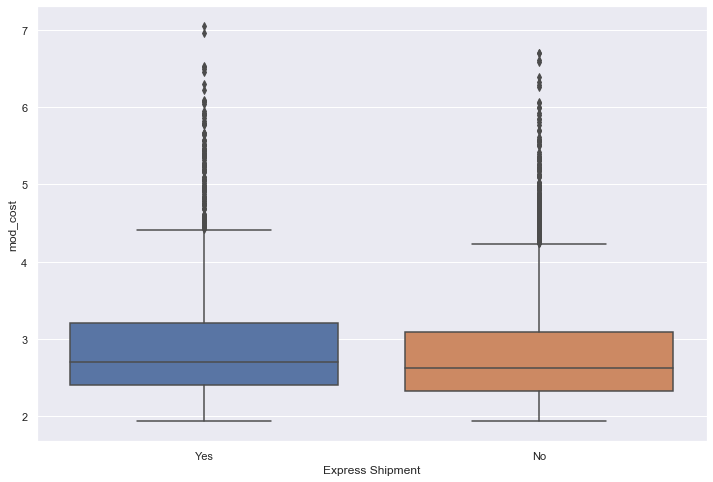

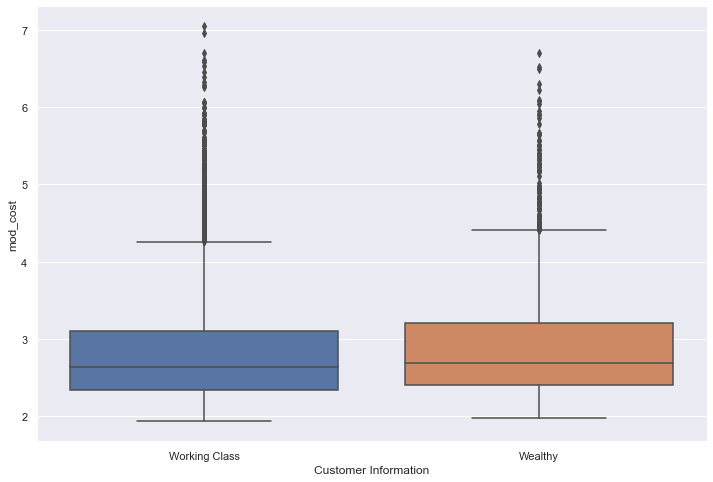

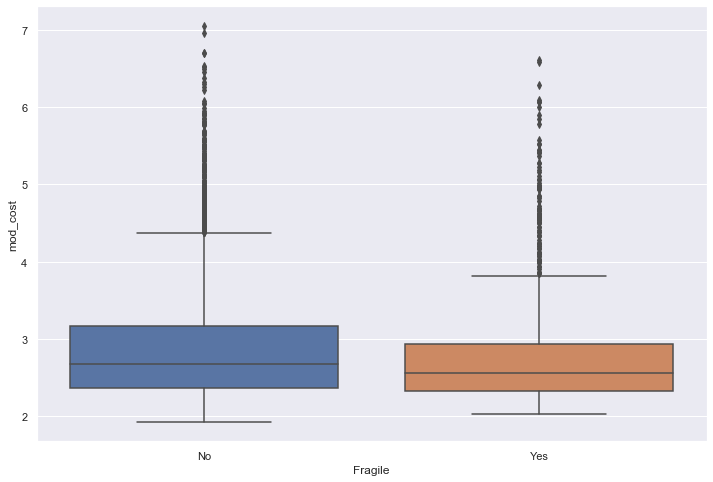

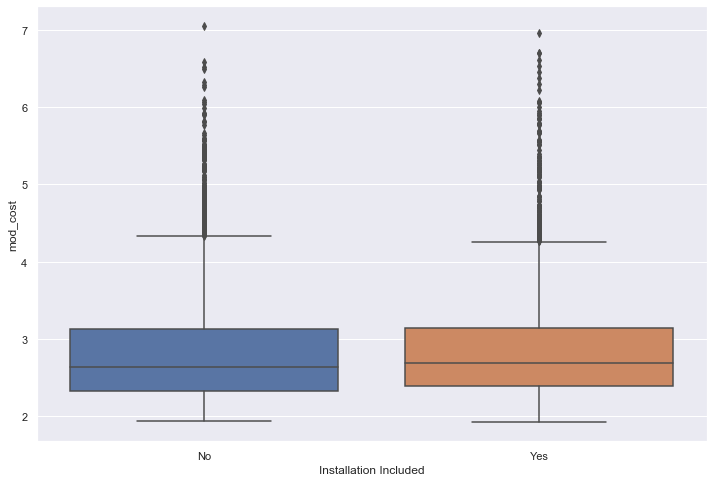

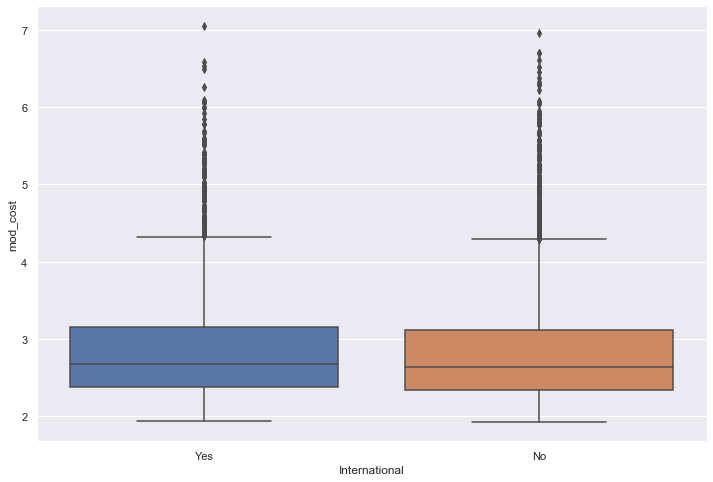

In [28]:
li=['Express Shipment','Customer Information','Fragile','Installation Included','International']
for i in li:
    sns.boxplot(x=i,y='mod_cost',data=train)
    plt.show()

In [29]:
num.describe(include='all')

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Cost,mod_cost
count,5750.000000,6125.000000,5916.000000,5.913000e+03,6500.00000,6500.000000,6.500000e+03,6500.000000
mean,0.461850,21.766204,9.617647,4.006948e+05,1192.42009,37.407174,1.713920e+04,2.863324
std,0.265781,11.968192,5.417000,2.678081e+06,8819.61675,26.873519,2.406579e+05,0.717782
min,0.000000,3.000000,2.000000,3.000000e+00,3.00000,10.000000,-8.801727e+05,1.934852
25%,0.240000,12.000000,6.000000,5.030000e+02,5.23000,16.700000,1.884400e+02,2.355633
50%,0.450000,20.000000,8.000000,3.102000e+03,8.02500,23.505000,3.820650e+02,2.661012
75%,0.680000,30.000000,12.000000,3.645600e+04,89.47000,57.905000,1.156115e+03,3.135537
max,1.000000,73.000000,50.000000,1.179279e+08,382385.67000,99.980000,1.114343e+07,7.047019


In [30]:
train.drop('Cost',axis=1,inplace=True)

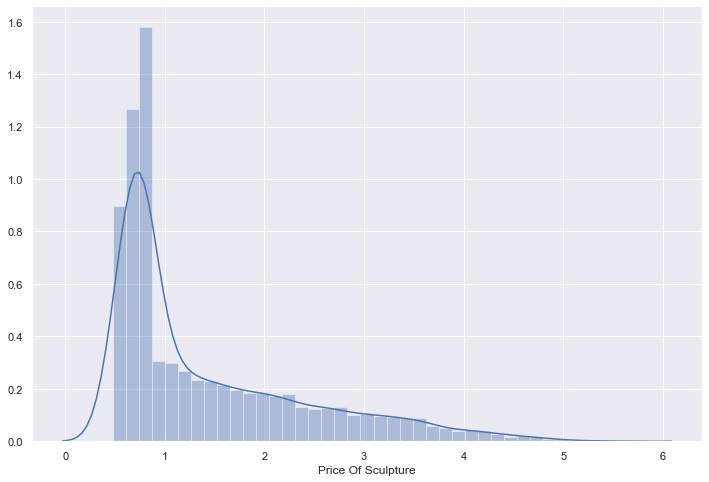

In [31]:
sns.distplot(np.log10(num['Price Of Sculpture']))

In [32]:
train['Price Of Sculpture']=np.log10(train['Price Of Sculpture'])
test['Price Of Sculpture']=np.log10(test['Price Of Sculpture'])

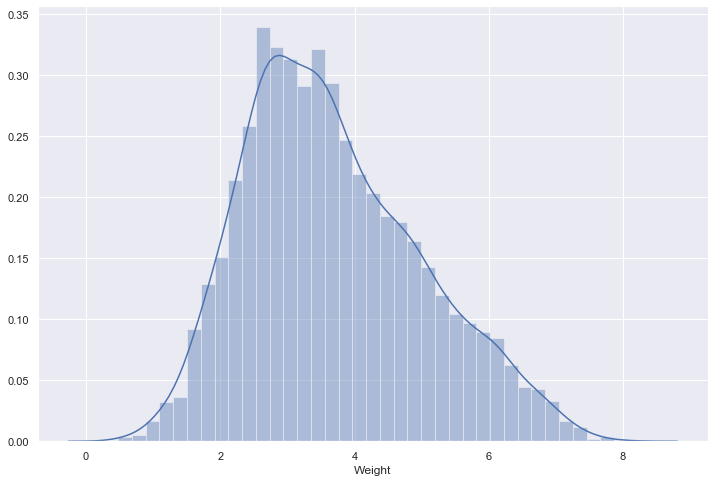

In [33]:
sns.distplot(np.log10(num['Weight']))

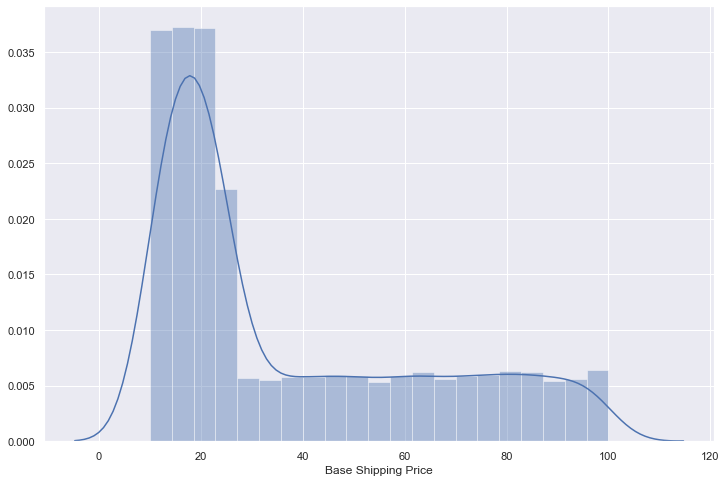

In [34]:
sns.distplot(train['Base Shipping Price'])

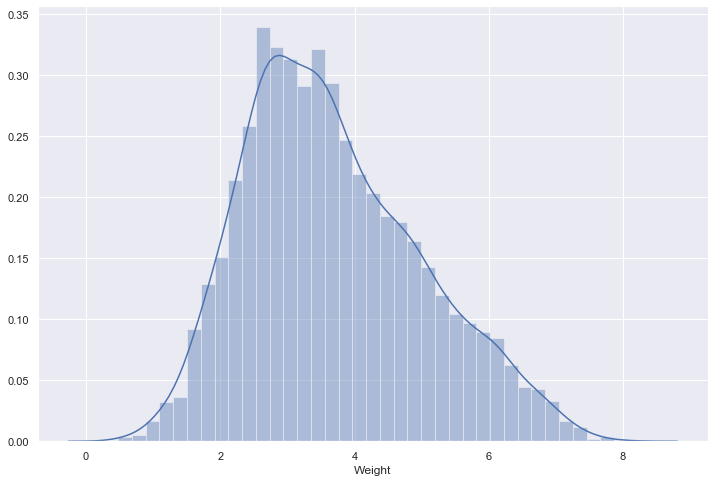

In [35]:
sns.distplot(np.log10(train['Weight']))

In [36]:
train['Weight']=np.log10(train['Weight'])
test['Weight']=np.log10(test['Weight'])

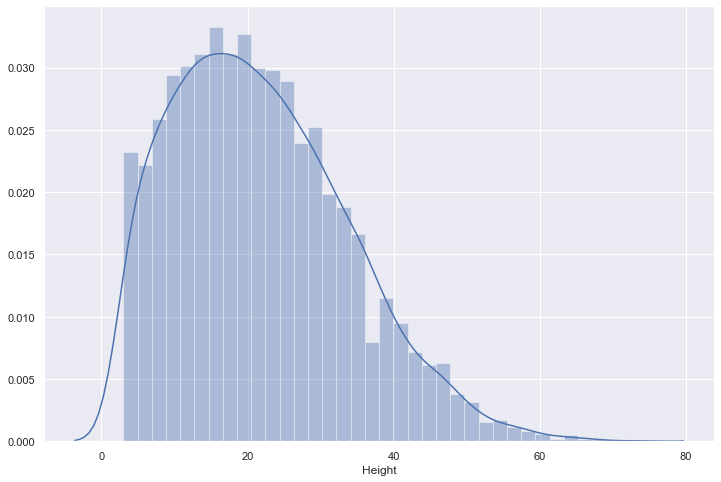

In [37]:
sns.distplot(train['Height'])

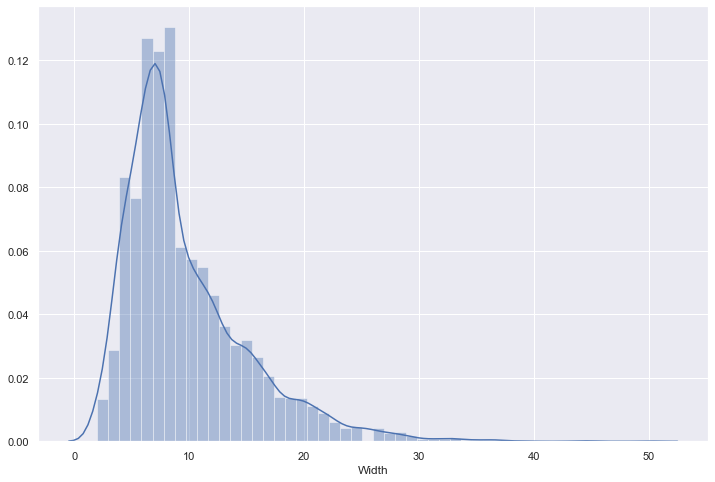

In [38]:
sns.distplot(train['Width'])

In [39]:
cat_data

,Customer Id,Artist Name,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location
0,fffe3900350033003300,Billy Jenkins,Brass,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777"
1,fffe3800330031003900,Jean Bryant,Brass,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072"
2,fffe3600370035003100,Laura Miller,Clay,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241"
3,fffe350031003300,Robert Chaires,Aluminium,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375"
4,fffe3900320038003400,Rosalyn Krol,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,fffe3800370037003300,Jeffrey Freudenthal,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335"
6496,fffe310036003400,Larry Edwards,NaN,No,No,No,Roadways,No,Working Class,No,08/29/15,08/27/15,"New Joshua, VA 35766"
6497,fffe3600300031003300,Denise Worth,Clay,Yes,No,No,NaN,Yes,Wealthy,No,04/10/19,04/09/19,"Lake Kelly, MA 80823"
6498,fffe3600350035003900,Daniel Drew,Stone,No,Yes,No,Roadways,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006"


In [40]:
len(cat_data['Customer Location'].unique())

6500

In [41]:
train[train['Scheduled Date']==train['Delivery Date']]

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,mod_cost
11,fffe380031003700,Stacey Carlozzi,0.29,32.0,9.0,NaN,Stone,3.255504,56.04,No,No,Yes,Airways,No,Working Class,No,03/01/16,03/01/16,"Jacquelinemouth, WA 65740",3.613523
21,fffe320030003900,Laura Price,0.11,NaN,9.0,5.336298,Marble,2.420005,46.56,Yes,No,Yes,Waterways,No,Working Class,No,07/06/17,07/06/17,"East Stephanie, WY 49027",2.850640
24,fffe3200320035003600,Ma Sova,0.43,24.0,8.0,5.417575,Marble,3.193709,91.58,Yes,No,No,Waterways,No,Working Class,No,12/31/16,12/31/16,"North Elizabeth, AR 06294",3.361112
28,fffe320038003600,Marian Castillo,0.51,16.0,8.0,4.804276,NaN,2.179523,59.22,No,No,Yes,NaN,No,Wealthy,Yes,05/23/18,05/23/18,"Justinmouth, MN 41168",3.036373
32,fffe38003100,Viola Lackland,0.31,13.0,7.0,2.652246,Aluminium,0.691081,24.67,No,No,Yes,Airways,No,Working Class,No,10/01/18,10/01/18,DPO AA 66525,2.330718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,fffe3400310033003900,Gilbert Atkinson,0.47,26.0,16.0,6.423493,Stone,3.724482,70.05,No,Yes,No,Airways,No,Wealthy,Yes,11/11/16,11/11/16,"Anthonyville, AL 39873",4.899098
6470,fffe3100380035003600,Candice Nowakowski,0.68,NaN,NaN,3.268812,Aluminium,1.071514,14.55,Yes,No,No,Roadways,No,Working Class,No,01/04/19,01/04/19,"East Raymond, KS 38276",2.581141
6472,fffe3600380036003000,Jason Stanfield,0.03,22.0,15.0,6.015143,Stone,3.263027,96.69,No,Yes,No,Airways,No,Working Class,No,01/13/17,01/13/17,"New John, IN 95571",3.610448
6485,fffe3500320033003100,Reynalda Knight,0.85,16.0,8.0,3.071514,Clay,1.078457,19.19,No,Yes,Yes,Airways,Yes,Wealthy,NaN,07/16/15,07/16/15,APO AE 98627,2.842328


In [42]:
def convert(x,y):
    if x<y:
        return 'late'
    elif x>y:
        return 'prev'
    elif x==y:
        return 'samet' 
train['time']=train.apply(lambda x: convert(x['Scheduled Date'],x['Delivery Date']),axis=1)
test['time']=train.apply(lambda x: convert(x['Scheduled Date'],x['Delivery Date']),axis=1)


In [43]:
train.groupby('time')['mod_cost'].mean()

time
late     2.847301
prev     2.876212
samet    2.868499
Name: mod_cost, dtype: float64

In [44]:
train.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,mod_cost,time
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,3.615740,Brass,1.143327,16.27,Yes,...,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",2.452231,prev
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,1.785330,Brass,0.834421,15.00,No,...,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",2.204011,prev
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,2.374748,Clay,0.695482,21.18,No,...,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",2.188338,prev
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,0.764176,16.31,No,...,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",2.207257,prev
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,2.510545,Aluminium,0.502427,11.94,Yes,...,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",2.202025,prev


In [45]:
train.groupby('Customer Information')['mod_cost'].mean()

Customer Information
Wealthy          2.926679
Working Class    2.840940
Name: mod_cost, dtype: float64

In [46]:
train.groupby('Transport')['mod_cost'].mean()

Transport
Airways      2.909227
Roadways     2.855077
Waterways    2.781961
Name: mod_cost, dtype: float64

In [47]:
train.groupby('Material')['mod_cost'].mean()

Material
Aluminium    2.458516
Brass        2.857032
Bronze       2.748294
Clay         2.580326
Marble       3.385798
Stone        3.680414
Wood         2.394127
Name: mod_cost, dtype: float64

In [48]:
#map_material={'Stone':1,'Marble':2,'Brass':3,'Bronze':4,'Clay':5,'Aluminium':6,'Wood':7}
map_material={'Stone':7,'Marble':6,'Brass':5,'Bronze':4,'Clay':3,'Aluminium':2,'Wood':1}

In [49]:
train['Material'].mode()

0    Brass
dtype: object

In [50]:
list(train['Material'].unique())

['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone', nan]

In [51]:
train.isna().sum()

Customer Id                 0
Artist Name                 0
Artist Reputation         750
Height                    375
Width                     584
Weight                    587
Material                  764
Price Of Sculpture          0
Base Shipping Price         0
International               0
Express Shipment            0
Installation Included       0
Transport                1392
Fragile                     0
Customer Information        0
Remote Location           771
Scheduled Date              0
Delivery Date               0
Customer Location           0
mod_cost                    0
time                        0
dtype: int64

In [52]:
train['Material'].fillna('Brass',inplace=True)
test['Material'].fillna('Brass',inplace=True)

In [53]:
train['Material']=train['Material'].map(map_material)
test['Material']=test['Material'].map(map_material)

In [54]:
train['Material'].isna().sum()

0

In [55]:
cat_data.columns

Index(['Customer Id', 'Artist Name', 'Material', 'International',
       'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
       'Customer Information', 'Remote Location', 'Scheduled Date',
       'Delivery Date', 'Customer Location'],
      dtype='object')

In [56]:
res=cat_data[['International',
       'Express Shipment', 'Installation Included', 'Transport', 'Fragile',
       'Customer Information', 'Remote Location']]

In [57]:
res

,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location
0,Yes,Yes,No,Airways,No,Working Class,No
1,No,No,No,Roadways,No,Working Class,No
2,No,No,No,Roadways,Yes,Working Class,Yes
3,No,No,No,NaN,No,Wealthy,Yes
4,Yes,Yes,Yes,Airways,No,Working Class,No
...,...,...,...,...,...,...,...
6495,Yes,Yes,No,Airways,No,Wealthy,Yes
6496,No,No,No,Roadways,No,Working Class,No
6497,Yes,No,No,NaN,Yes,Wealthy,No
6498,No,Yes,No,Roadways,No,Working Class,Yes


In [58]:
train.isna().mean()

Customer Id              0.000000
Artist Name              0.000000
Artist Reputation        0.115385
Height                   0.057692
Width                    0.089846
Weight                   0.090308
Material                 0.000000
Price Of Sculpture       0.000000
Base Shipping Price      0.000000
International            0.000000
Express Shipment         0.000000
Installation Included    0.000000
Transport                0.214154
Fragile                  0.000000
Customer Information     0.000000
Remote Location          0.118615
Scheduled Date           0.000000
Delivery Date            0.000000
Customer Location        0.000000
mod_cost                 0.000000
time                     0.000000
dtype: float64

In [59]:
train[train['Transport'].isna()]

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,...,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,mod_cost,time
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,2,0.764176,16.31,No,...,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",2.207257,prev
5,fffe3300390039003900,Tracy Francis,0.99,46.0,19.0,3.071145,1,0.789581,16.88,No,...,No,NaN,No,Wealthy,No,08/28/15,08/26/15,"Maddenberg, AL 43096",3.283930,prev
10,fffe3100350034003800,Greg Mendez,0.14,47.0,25.0,4.611022,4,1.570776,85.09,No,...,Yes,NaN,No,Working Class,No,07/29/15,07/27/15,"Brittanyside, GA 80351",2.814687,prev
13,fffe3400370033003400,James Davis,0.54,26.0,9.0,NaN,1,0.810904,17.55,No,...,Yes,NaN,No,Working Class,No,09/16/18,09/17/18,"West Shannonside, WA 15898",2.525019,late
20,fffe3300370038003200,Kathryn Dodge,0.59,20.0,9.0,2.296665,5,0.745075,15.76,No,...,No,NaN,No,Wealthy,No,11/10/18,11/07/18,"Sanchezborough, MI 63030",2.503437,prev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6467,fffe3300390038003500,Mildred Fields,0.32,19.0,6.0,NaN,3,0.693727,24.86,Yes,...,No,NaN,Yes,Wealthy,No,03/24/16,03/23/16,"Danaton, LA 55269",2.492271,prev
6468,fffe3200360031003500,Charles Shinn,NaN,46.0,21.0,3.260310,1,0.582063,10.59,No,...,No,NaN,No,Working Class,NaN,04/24/17,04/22/17,"Kimberlystad, NY 31863",2.204337,prev
6475,fffe3400370034003500,John Wilkins,0.63,12.0,8.0,3.552547,5,1.019532,15.95,No,...,No,NaN,No,Wealthy,No,12/29/15,12/31/15,"South Manuelborough, MO 86421",2.570508,late
6487,fffe3200350033003500,Lloyd Sartin,0.38,30.0,9.0,2.812245,1,0.718502,15.00,No,...,Yes,NaN,No,Wealthy,NaN,01/28/18,01/25/18,"Port Jason, SD 78959",2.429300,prev


In [60]:
train['Transport'].unique()

array(['Airways', 'Roadways', nan, 'Waterways'], dtype=object)

In [61]:
train['Transport'].fillna('Roadways',inplace=True)
test['Transport'].fillna('Roadways',inplace=True)

In [62]:
train['Remote Location'].mode()

0    No
dtype: object

In [63]:
train['Remote Location'].fillna('No',inplace=True)
test['Remote Location'].fillna('No',inplace=True)

In [64]:
train['Height'].mean()

21.766204081632655

In [65]:
train['Height'].fillna(train['Height'].mean(),inplace=True)
test['Height'].fillna(train['Height'].mean(),inplace=True)

In [66]:
train['Width'].fillna(train['Width'].mean(),inplace=True)
test['Width'].fillna(train['Width'].mean(),inplace=True)

In [67]:
train['Weight'].fillna(train['Weight'].mean(),inplace=True)
test['Weight'].fillna(train['Weight'].mean(),inplace=True)

In [68]:
train['Artist Reputation'].fillna(train['Artist Reputation'].mean(),inplace=True)


In [69]:
test['Artist Reputation'].fillna(train['Artist Reputation'].mean(),inplace=True)


In [70]:
train.isna().mean()

Customer Id              0.0
Artist Name              0.0
Artist Reputation        0.0
Height                   0.0
Width                    0.0
Weight                   0.0
Material                 0.0
Price Of Sculpture       0.0
Base Shipping Price      0.0
International            0.0
Express Shipment         0.0
Installation Included    0.0
Transport                0.0
Fragile                  0.0
Customer Information     0.0
Remote Location          0.0
Scheduled Date           0.0
Delivery Date            0.0
Customer Location        0.0
mod_cost                 0.0
time                     0.0
dtype: float64

In [71]:
x=train.drop('mod_cost',axis=1)
y=train['mod_cost']

In [72]:
x=pd.concat([x,test],axis=0)

In [73]:
x.isna().mean()

Customer Id              0.0
Artist Name              0.0
Artist Reputation        0.0
Height                   0.0
Width                    0.0
Weight                   0.0
Material                 0.0
Price Of Sculpture       0.0
Base Shipping Price      0.0
International            0.0
Express Shipment         0.0
Installation Included    0.0
Transport                0.0
Fragile                  0.0
Customer Information     0.0
Remote Location          0.0
Scheduled Date           0.0
Delivery Date            0.0
Customer Location        0.0
time                     0.0
dtype: float64

AttributeError: 'AxesSubplot' object has no attribute 'nlargest'

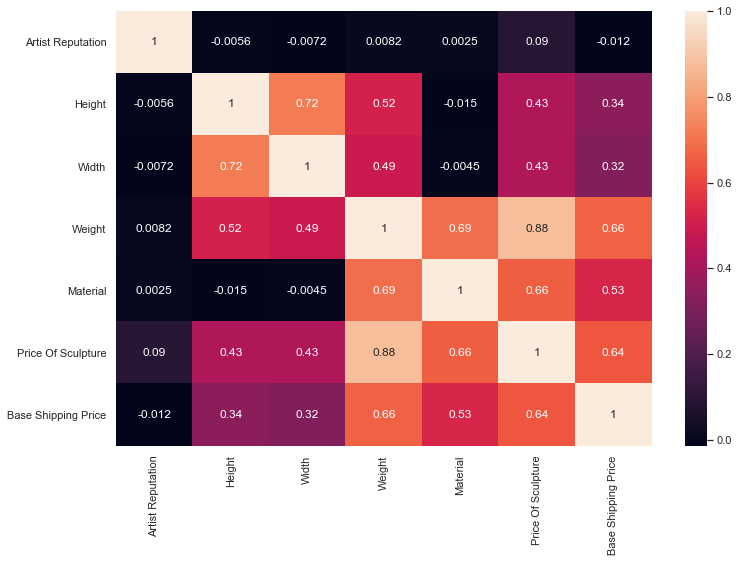

In [74]:
sns.heatmap(x.corr(),annot=True).nlargest(10)

In [75]:
x.drop(['Artist Name','Scheduled Date','Delivery Date','Customer Location'],axis=1,inplace=True)

In [76]:
x=pd.get_dummies(x.drop('Customer Id',axis=1))

In [77]:
x.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International_No,International_Yes,Express Shipment_No,...,Transport_Waterways,Fragile_No,Fragile_Yes,Customer Information_Wealthy,Customer Information_Working Class,Remote Location_No,Remote Location_Yes,time_late,time_prev,time_samet
0,0.26,17.0,6.000000,3.615740,5,1.143327,16.27,0,1,0,...,0,1,0,0,1,1,0,0,1,0
1,0.28,3.0,3.000000,1.785330,5,0.834421,15.00,1,0,1,...,0,1,0,0,1,1,0,0,1,0
2,0.07,8.0,5.000000,2.374748,3,0.695482,21.18,1,0,1,...,0,0,1,0,1,0,1,0,1,0
3,0.12,9.0,9.617647,3.687536,2,0.764176,16.31,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,0.15,17.0,6.000000,2.510545,2,0.502427,11.94,0,1,0,...,0,1,0,0,1,1,0,0,1,0


In [78]:
x.isnull().sum()

Artist Reputation                     0
Height                                0
Width                                 0
Weight                                0
Material                              0
Price Of Sculpture                    0
Base Shipping Price                   0
International_No                      0
International_Yes                     0
Express Shipment_No                   0
Express Shipment_Yes                  0
Installation Included_No              0
Installation Included_Yes             0
Transport_Airways                     0
Transport_Roadways                    0
Transport_Waterways                   0
Fragile_No                            0
Fragile_Yes                           0
Customer Information_Wealthy          0
Customer Information_Working Class    0
Remote Location_No                    0
Remote Location_Yes                   0
time_late                             0
time_prev                             0
time_samet                            0


In [79]:
test.shape,train.shape

((3500, 20), (6500, 21))

In [86]:
train1=x.iloc[:6500,:]
test1=x.iloc[6500:,:]

In [87]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [88]:
test1.isnull().sum()

Artist Reputation                     0
Height                                0
Width                                 0
Weight                                0
Material                              0
Price Of Sculpture                    0
Base Shipping Price                   0
International_No                      0
International_Yes                     0
Express Shipment_No                   0
Express Shipment_Yes                  0
Installation Included_No              0
Installation Included_Yes             0
Transport_Airways                     0
Transport_Roadways                    0
Transport_Waterways                   0
Fragile_No                            0
Fragile_Yes                           0
Customer Information_Wealthy          0
Customer Information_Working Class    0
Remote Location_No                    0
Remote Location_Yes                   0
time_late                             0
time_prev                             0
time_samet                            0


In [89]:
x_train,x_test,y_train,y_test=train_test_split(train1,y,test_size=0.15)

In [90]:
grad=GradientBoostingRegressor()
grad.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
grad.score(x_train,y_train),grad.score(x_test,y_test)

(0.9666224583074184, 0.9557618707143203)

In [92]:
param_grid={'min_samples_leaf':[5,6,7,8],'n_estimators':[260,280,300],'max_depth':[4,5,6],'max_features':['sqrt','log2','auto']}
grid=GridSearchCV(estimator=grad,param_grid=param_grid,cv=5,verbose=5,n_jobs=-1)

In [93]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  6.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [513]:
grid.score(x_train,y_train),grid.score(x_test,y_test)

(0.9928884661096457, 0.9699461819693178)

In [520]:
grid.fit(train1,y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [521]:
grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [228]:
grid.score(x_train,y_train),grid.score(x_test,y_test)

(0.9928282312913629, 0.9745281546028132)

In [523]:
predict=grid.predict(test1)

In [230]:
from sklearn.metrics import mean_squared_log_error
score = 100*max(0, 1-mean_squared_log_error(y,grid.predict(train1)))
score

99.96776320072816

In [522]:
grid.score(train1,y)

0.9918938497504611

In [222]:
grad.fit(train1,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [121]:
predict=grad.predict(test1)

In [119]:
forest=RandomForestRegressor()
forest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [120]:
forest.score(x_train,y_train),forest.score(x_test,y_test)

(0.9946474258219067, 0.9539091854456448)

In [525]:
predicted=forest.predict(x_test)
actual=y_test

In [526]:
from sklearn.metrics import mean_squared_log_error

In [527]:
score = 100*max(0, 1-mean_squared_log_error(actual, predicted))

In [528]:
score

99.87283450414085

In [343]:
predict=forest.predict(test1)

NameError: name 'forest' is not defined

In [103]:
predict

array([2.44658284, 2.48377585, 2.31358969, ..., 2.67006909, 2.38880783,
       5.18318914])

In [524]:
s=10**predict

In [525]:
res=pd.DataFrame(test.iloc[:,0])

In [526]:
res['Cost']=s

In [527]:

res.describe(include='all')

,Customer Id,Cost
count,3500,3.500000e+03
unique,3500,NaN
top,fffe3400350036003900,NaN
freq,1,NaN
mean,NaN,1.221594e+04
std,NaN,1.339521e+05
min,NaN,8.895419e+01
25%,NaN,2.235431e+02
50%,NaN,4.462571e+02
75%,NaN,1.294889e+03


In [528]:
res.to_csv(r"C:\Users\Vineet Rawat\Downloads\dataset\output.csv", index=False)

In [139]:
param_grid={'min_samples_leaf':[6,8,10,12,20],'n_estimators':[240,260],'max_depth':[14,16,18],}

In [140]:
grid=GridSearchCV(estimator=forest,cv=5,param_grid=param_grid,n_jobs=-1,verbose=5)

In [141]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [142]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=260, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
grid.score(x_train,y_train),grid.score(x_test,y_test)

(0.9801142607012443, 0.9544512187225782)

In [126]:
price=grid.predict(test1)

In [127]:
res['Cost']=10**price

In [128]:
res.to_csv(r"C:\Users\Vineet Rawat\Downloads\dataset\output.csv", index=False)